## Import the Required Libraries and Files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, SGDRegressor, Ridge
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso

from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve

In [3]:
df=pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [4]:
df_eda=df.copy()
df_eda.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


## find the minimum, maximum of Selling Brand, City also find the Data types of each column.

In [50]:
df_eda["brand"].value_counts()

Bajaj              11213
Hero                6368
Royal Enfield       4178
Yamaha              3916
Honda               2108
Suzuki              1464
TVS                 1247
KTM                 1077
Harley-Davidson      737
Kawasaki              79
Hyosung               64
Benelli               56
Mahindra              55
Triumph               26
Ducati                22
BMW                   16
Jawa                  10
MV                     4
Indian                 3
Ideal                  2
Rajdoot                1
LML                    1
Yezdi                  1
Name: brand, dtype: int64

In [51]:
df_eda["city"].value_counts()

Delhi          7318
Bangalore      2723
Mumbai         2591
Hyderabad      2160
Pune           1724
               ... 
Alappuzha         1
Shimla            1
Murad Nagar       1
Bhilwara          1
Manali            1
Name: city, Length: 443, dtype: int64

In [53]:
df_eda["owner"].value_counts()

1    29964
2     2564
3      108
4       12
Name: owner, dtype: int64

In [5]:
df_eda.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner          object
age           float64
power         float64
brand          object
dtype: object

In [6]:
df_eda=df_eda.replace("First Owner", 1)
df_eda=df_eda.replace("Second Owner", 2)
df_eda=df_eda.replace("Third Owner", 3)
df_eda=df_eda.replace("Fourth Owner Or More", 4)

In [7]:
df_eda.tail()

,bike_name,price,city,kms_driven,owner,age,power,brand
32643,Hero Passion Pro 100cc,39000.0,Delhi,22000.0,1,4.0,100.0,Hero
32644,TVS Apache RTR 180cc,30000.0,Karnal,6639.0,1,9.0,180.0,TVS
32645,Bajaj Avenger Street 220,60000.0,Delhi,20373.0,1,6.0,220.0,Bajaj
32646,Hero Super Splendor 125cc,15600.0,Jaipur,84186.0,1,16.0,125.0,Hero
32647,Bajaj Pulsar 150cc,22000.0,Pune,60857.0,1,13.0,150.0,Bajaj


In [8]:
df_eda['owner'].dtypes

dtype('int64')

In [9]:
df_eda['owner']=df_eda.owner.astype(int)

In [10]:
df_eda.columns
df_eda.dtypes

bike_name      object
price         float64
city           object
kms_driven    float64
owner           int32
age           float64
power         float64
brand          object
dtype: object

## To extract Numerical & Categorical Features

In [54]:
#Numerical Features and Categorical Features
count_num_bike = 0
num_features = []
for col in df_eda.select_dtypes("float"):
    num_features.append(col)
    count_num_bike += 1
print(f"Number of numerical features is: {count_num_bike}")
print(num_features)

Number of numerical features is: 4
['price', 'kms_driven', 'age', 'power']


In [55]:
count_categ_bike = 0
cat_features = []
for col in df_eda.select_dtypes("object"):
    cat_features.append(col)
    count_categ_bike += 1
print(f"Number of numerical features is: {count_categ_bike}")
print(cat_features)

Number of numerical features is: 3
['bike_name', 'city', 'brand']


In [13]:
df_eda.dtypes.value_counts()

float64    4
object     3
int32      1
dtype: int64

In [14]:
df_eda.describe()

,price,kms_driven,owner,age,power
count,3.264800e+04,32648.000000,32648.000000,32648.000000,32648.000000
mean,6.829542e+04,26344.625184,1.086253,8.048211,213.511302
std,9.071860e+04,22208.527695,0.296037,4.031700,134.428868
min,4.400000e+03,1.000000,1.000000,1.000000,100.000000
25%,2.500000e+04,12000.000000,1.000000,5.000000,150.000000
50%,4.300000e+04,20373.000000,1.000000,7.000000,150.000000
75%,8.000000e+04,35000.000000,1.000000,10.000000,220.000000
max,1.900000e+06,750000.000000,4.000000,63.000000,1800.000000


In [15]:
df_eda.isna().sum() #to check is there any null value in the datasets

bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

<Figure size 2160x2160 with 0 Axes>

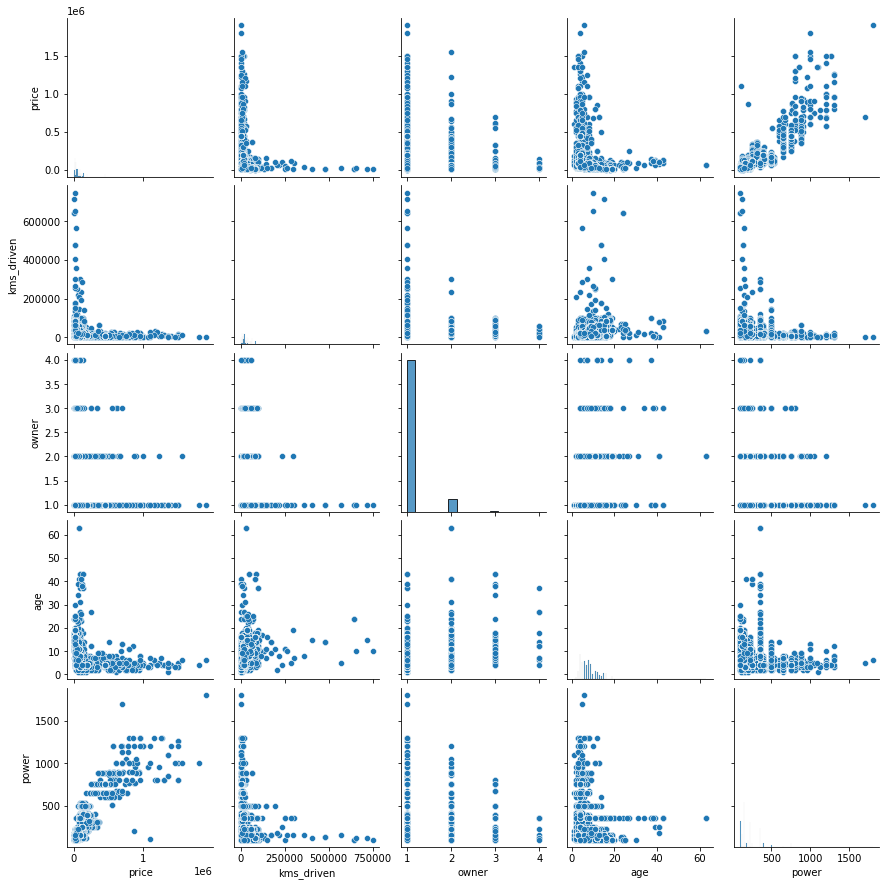

In [16]:
plt.figure(figsize=(30,30))
sns.pairplot(df_eda)

## Observe the features correlation and Exploratory Data Analysis

<AxesSubplot:>

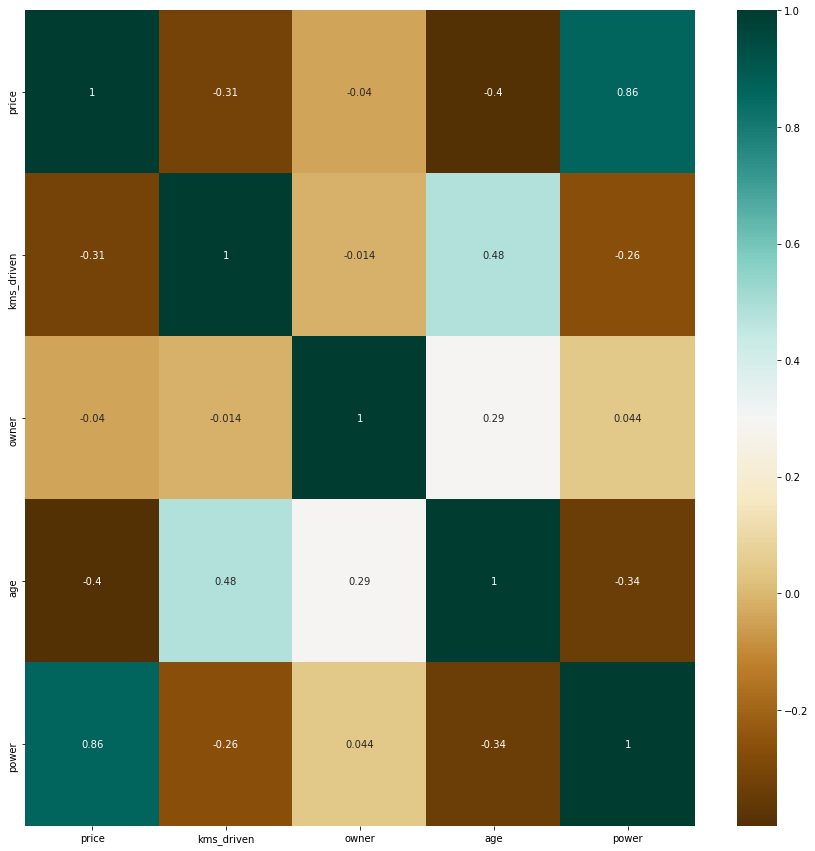

In [17]:
plt.figure(figsize=(15,15)) #use of heatmap to correlate the features
sns.heatmap(df_eda.corr(), annot=True, cmap='BrBG')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

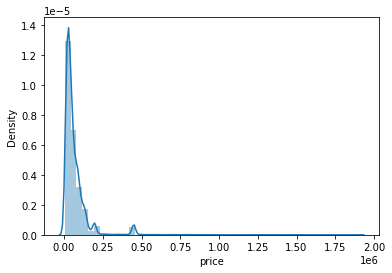

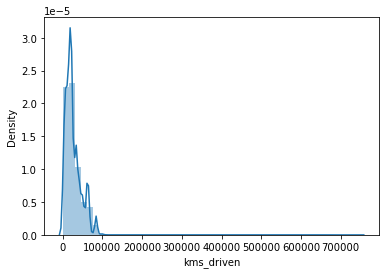

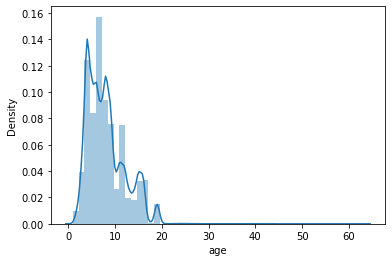

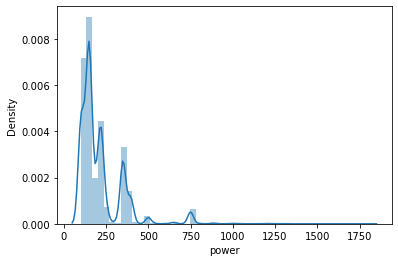

In [18]:
for col in df_eda.select_dtypes("float64"):
    plt.figure()
    sns.distplot(df_eda[col])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


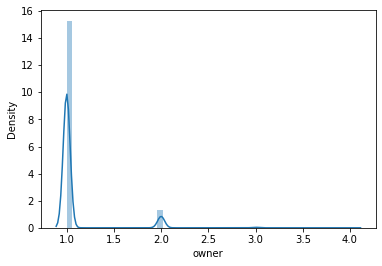

In [19]:
for col in df_eda.select_dtypes("int32"):
    plt.figure()
    sns.distplot(df_eda[col])

 Feature name: city


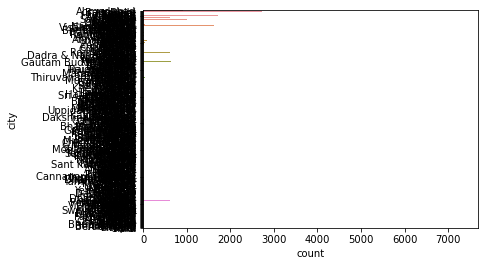

 Feature name: brand


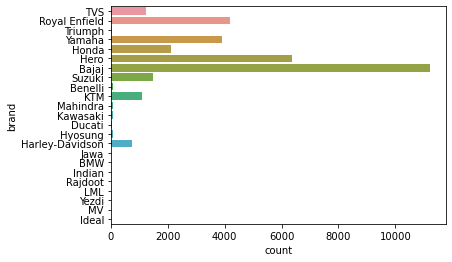

In [20]:
categorical_features = df_eda.select_dtypes("object").columns.to_list()
for col in categorical_features[1:]:
    print(f" Feature name: {col}")
    sns.countplot(y = df_eda[col])
    plt.show()

- Most of the Owner have Bajaj, followed by Hero, Royal Enfield, Yamaha.
- Most of the bikes mentioned in the dataset are first owned.
- Most of the bikes have around 100-250cc of power.

## Implementation of All Regression Models

In [21]:
# Splitting the trainset into Training and Test set
df_test_perfor = df_eda.copy()
df_test_perfor = df_test_perfor.select_dtypes(exclude="object")
y = df_test_perfor["price"]
df_test_perfor = df_test_perfor.drop("price", axis=1)
#[col for col in df[df.select_dtypes(exclude="object")]]

x_train, x_test, y_train, y_test = train_test_split(df_test_perfor, y, test_size=0.45, random_state=100)

print(f"x_train shape is: {x_train.shape}")
print(f"y_train shape is: {y_train.shape}")
print(f"x_test shape is: {x_test.shape}")
print(f"y_test shape is: {y_test.shape}")

x_train shape is: (17956, 4)
y_train shape is: (17956,)
x_test shape is: (14692, 4)
y_test shape is: (14692,)


## Performance Before Processing

In [22]:
models = {"Linear Regression": LinearRegression(),
          "XGBRegressor": LinearRegression(),
          "Decision Tree Regressor": DecisionTreeRegressor(max_depth=2),
          #"Lasso": Lasso(alpha=.1, normalize=True, tol=1e-2),
          "Ridge": Ridge(),
          #"Polynomial Features": PolynomialFeatures(degree=2),
          "Gradient Boosting Regressor": GradientBoostingRegressor(),
         # "Dummy Regressor": DummyRegressor(),
          "Elastic Net": ElasticNet(alpha=1, l1_ratio=0.9, selection='random'),
          "SGD Regressor": SGDRegressor()
} 

In [ ]:
# from sklearn.exceptions import ConvergenceWarning

import warnings 
# run block of code and catch warnings
with warnings.catch_warnings():
    # ignore all caught warnings 
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=ConvergenceWarning)
    
    
for name, model in models.items():
    print("====================================================")
    print("Model: ", name)
    print("==========================")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
  
    print(f"Mean Squared Error(MSE) = {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error(MAE) = {mean_absolute_error(y_test, y_pred)}")
    print("----------------------")
    print(f"Score of train set(r_2_score) = {model.score(x_train, y_train)}")
    print(f"Score of test set (r_2_score) = {model.score(x_test, y_test)}") 

    # Use learning curve to get training and test scores along with train sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=x_train, y=y_train,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         n_jobs=1)

    # Calculate training and test mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training r2_score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation r2_score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title(f"Learning Curve using model: {name}")
    plt.xlabel('Training train Size')
    plt.ylabel('Model r2_score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

## Performance after processing

In [24]:
# Delete high correlated features 

#len([feature for feature in data.columns if any(abs(data.corr()>0.12) & abs(data.corr()<=1))])
upper_tri = df_eda.corr().where(np.triu(np.ones(df_eda.corr().shape),k=1).astype(np.bool))
#print(upper_tri)
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop

<ipython-input-24-bb2e31a787ec>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = df_eda.corr().where(np.triu(np.ones(df_eda.corr().shape),k=1).astype(np.bool))


[]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df_eda, y, test_size=0.33, random_state=42) 

In [33]:
def encoder_cat(data): #encodage
    for col in data.select_dtypes("object"):
        data[col] = LabelEncoder().fit_transform(data[col])
    return data  

In [34]:
def featuresScaling(data): #Standard Scaling Transformation
    data = StandardScaler().fit_transform(data)
    return data

In [35]:
df_bike_nodrop = df.copy()
x_train, x_test, y_train, y_test = train_test_split(df_bike_nodrop, y, test_size=0.33, random_state=42) 

# Preprocessing data to train model
def preprocessing(df):
    df = df.drop(["bike_name"], axis=1)
    df = encoder_cat(df)
    df = featuresScaling(df)
    return df

x_train = preprocessing(x_train)
x_test = preprocessing(x_test)

Model:  Linear Regression
Mean Squared Error(MSE) = 740905.801486896
Mean Absolute Error(MAE) = 520.4819895260505
----------------------
Score of train set(r_2_score) = 1.0
Score of test set (r_2_score) = 0.999911083782069


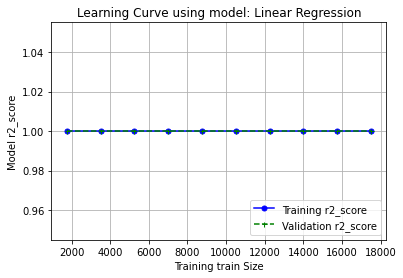

<Figure size 276480x155520 with 0 Axes>

Model:  XGBRegressor
Mean Squared Error(MSE) = 740905.801486896
Mean Absolute Error(MAE) = 520.4819895260505
----------------------
Score of train set(r_2_score) = 1.0
Score of test set (r_2_score) = 0.999911083782069


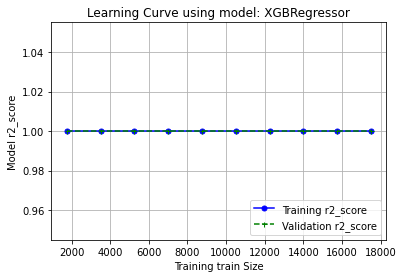

<Figure size 276480x155520 with 0 Axes>

Model:  Decision Tree Regressor
Mean Squared Error(MSE) = 923805751.8360131
Mean Absolute Error(MAE) = 19147.124921800212
----------------------
Score of train set(r_2_score) = 0.903095595889081
Score of test set (r_2_score) = 0.8891339312079688


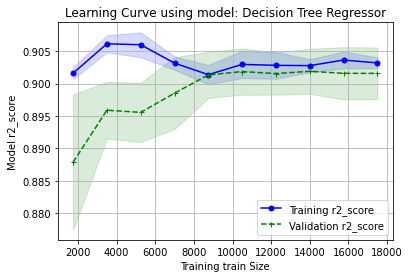

<Figure size 276480x155520 with 0 Axes>

Model:  Ridge
Mean Squared Error(MSE) = 748450.2699591239
Mean Absolute Error(MAE) = 520.2183508671985
----------------------
Score of train set(r_2_score) = 0.9999999906915598
Score of test set (r_2_score) = 0.9999101783692602


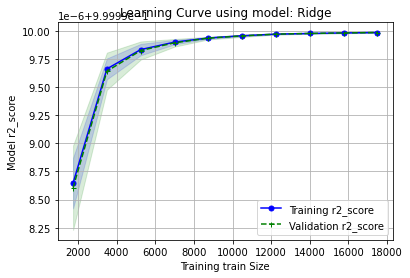

<Figure size 276480x155520 with 0 Axes>

Model:  Gradient Boosting Regressor
Mean Squared Error(MSE) = 2554863.3366825082
Mean Absolute Error(MAE) = 452.5767155925297
----------------------
Score of train set(r_2_score) = 0.9999743667145505
Score of test set (r_2_score) = 0.9996933904623608


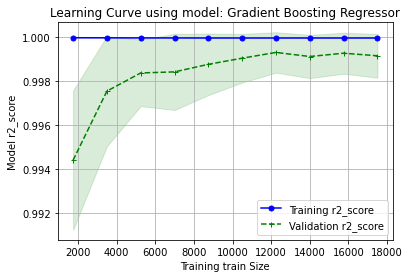

<Figure size 276480x155520 with 0 Axes>

Model:  Elastic Net
Mean Squared Error(MSE) = 151706807.1228236
Mean Absolute Error(MAE) = 6289.928468353912
----------------------
Score of train set(r_2_score) = 0.9847007412713312
Score of test set (r_2_score) = 0.9817936430020366


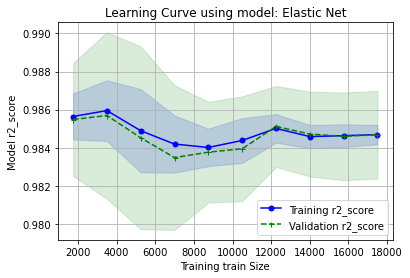

<Figure size 276480x155520 with 0 Axes>

Model:  SGD Regressor
Mean Squared Error(MSE) = 750307.9101534165
Mean Absolute Error(MAE) = 518.0353202991724
----------------------
Score of train set(r_2_score) = 0.9999999606090262
Score of test set (r_2_score) = 0.999909955433578


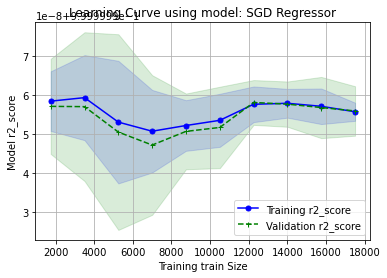

<Figure size 276480x155520 with 0 Axes>

In [56]:
for name, model in models.items():
    print("====================================================")
    print("Model: ", name)
    print("==========================")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
  
    print(f"Mean Squared Error(MSE) = {mean_squared_error(y_test, y_pred)}")
    print(f"Mean Absolute Error(MAE) = {mean_absolute_error(y_test, y_pred)}")
    print("----------------------")
    print(f"Score of train set(r_2_score) = {model.score(x_train, y_train)}")
    print(f"Score of test set (r_2_score) = {model.score(x_test, y_test)}") 

    # Use learning curve to get training and test scores along with train sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator=model, X=x_train, y=y_train,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         n_jobs=1)

    # Calculate training and test mean and std
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training r2_score')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation r2_score')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title(f"Learning Curve using model: {name}")
    plt.xlabel('Training train Size')
    plt.ylabel('Model r2_score')
    plt.grid()
    plt.legend(loc='lower right')
    plt.figure(figsize=(3840,2160)) 
    plt.show()

- XGB Regressor and Linear Regression gives the same result
- ElasticNet gives the Highest Mean Squared Error while Decision Tree Regressor gives the highest Mean Absolute Error